<a href="https://colab.research.google.com/github/Pranotidesai663/Bank-Analysis/blob/main/Bank_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv("Finance_1.csv")
df2 = pd.read_csv("Finance_2.csv")

print("Shape df1:", df1.shape)
print("Shape df2:", df2.shape)


Shape df1: (39717, 24)
Shape df2: (39717, 25)


In [ ]:
df = df1.merge(df2, on='id', how='inner', suffixes=('_f1','_f2'))
print("Merged shape:", df.shape)


Merged shape: (39717, 48)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
next_pymnt_d,38577
mths_since_last_record,36931
mths_since_last_delinq,25682
desc,12942
emp_title,2459
emp_length,1075
last_pymnt_d,71
revol_util,50
title,11
last_credit_pull_d,2


In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

print(missing_percentage)



next_pymnt_d              97.129693
mths_since_last_record    92.985372
mths_since_last_delinq    64.662487
desc                      32.585543
emp_title                  6.191303
emp_length                 2.706650
last_pymnt_d               0.178765
revol_util                 0.125891
title                      0.027696
last_credit_pull_d         0.005036
dtype: float64


In [ ]:
# Drop unwanted columns
cols_to_drop = [
    'next_pymnt_d',
    'mths_since_last_record',
    'mths_since_last_delinq'
]
df = df.drop(columns=cols_to_drop)

print("Dropped columns:", cols_to_drop)


Dropped columns: ['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq']


In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

print(missing_percentage)



desc                  32.585543
emp_title              6.191303
emp_length             2.706650
last_pymnt_d           0.178765
revol_util             0.125891
title                  0.027696
last_credit_pull_d     0.005036
dtype: float64


In [ ]:
cols_to_drop = ['emp_title', 'desc', 'member_id']
df = df.drop(columns=cols_to_drop)
print("Dropped columns:", cols_to_drop)


Dropped columns: ['emp_title', 'desc', 'member_id']


In [ ]:
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)
df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float)

In [ ]:
# Numeric columns → fill with median
numeric_cols = ['revol_util', 'loan_amnt', 'funded_amnt',
                'funded_amnt_inv', 'int_rate', 'installment',
                'annual_inc', 'dti']



In [ ]:
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
# Correct datetime conversion
df['issue_d'] = pd.to_datetime(df['issue_d'], format="%b-%y", errors='coerce')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format="%b-%y", errors='coerce')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format="%b-%y", errors='coerce')


In [ ]:
df[['issue_d', 'last_pymnt_d', 'last_credit_pull_d']].head(10)


,issue_d,last_pymnt_d,last_credit_pull_d
0,2009-08-01,2011-10-01,2012-08-01
1,2008-05-01,2011-06-01,2012-08-01
2,2010-03-01,2013-03-01,2016-05-01
3,2009-11-01,2012-11-01,2016-05-01
4,2008-04-01,2011-04-01,2014-03-01
5,2009-09-01,2012-10-01,2012-09-01
6,2010-02-01,2012-03-01,2012-03-01
7,2010-02-01,2012-10-01,2013-03-01
8,2010-04-01,2011-02-01,2013-03-01
9,2009-08-01,2011-06-01,2016-05-01


In [ ]:
# Convert to categorical
categorical_cols = ['term', 'sub_grade', 'grade', 'emp_length',
                    'verification_status', 'home_ownership',
                    'pymnt_plan', 'loan_status', 'zip_code',
                    'purpose', 'addr_state']

for col in categorical_cols:
    df[col] = df[col].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   loan_amnt                39717 non-null  int64         
 2   funded_amnt              39717 non-null  int64         
 3   funded_amnt_inv          39717 non-null  float64       
 4   term                     39717 non-null  category      
 5   int_rate                 39717 non-null  float64       
 6   installment              39717 non-null  float64       
 7   grade                    39717 non-null  category      
 8   sub_grade                39717 non-null  category      
 9   emp_length               38642 non-null  category      
 10  home_ownership           39717 non-null  category      
 11  annual_inc               39717 non-null  float64       
 12  verification_status      39717 n

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


/tmp/ipython-input-489762890.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='issue_year', y='loan_amnt', data=yearly_loan, palette="Blues_d")


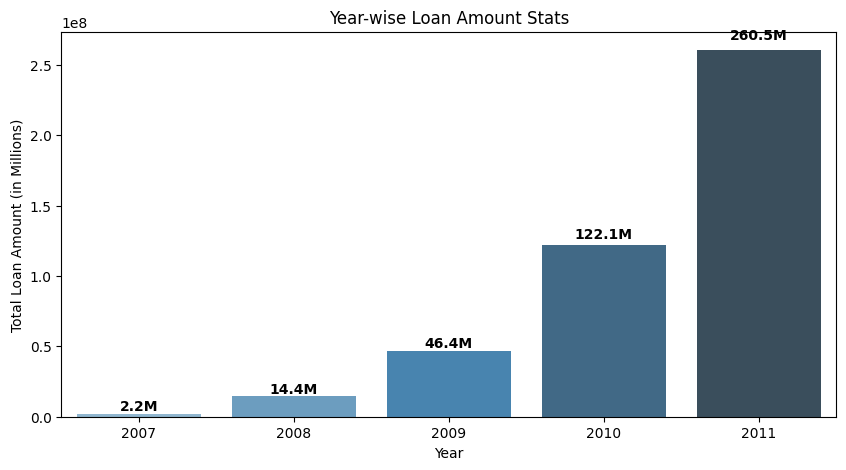

In [ ]:
# 1. Year wise loan amount stats
df['issue_year'] = df['issue_d'].dt.year
yearly_loan = df.groupby('issue_year')['loan_amnt'].sum().reset_index()

plt.figure(figsize=(10,5))
ax = sns.barplot(x='issue_year', y='loan_amnt', data=yearly_loan, palette="Blues_d")

# Add labels in millions above bars
for p in ax.patches:
    value = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,   # center of bar
        value + 0.02*value,           # slightly above bar
        f"{value/1e6:.1f}M",          # format in millions
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title("Year-wise Loan Amount Stats")
plt.ylabel("Total Loan Amount (in Millions)")
plt.xlabel("Year")
plt.show()


/tmp/ipython-input-500355022.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_revol = df.groupby(['grade','sub_grade'])['revol_bal'].sum().reset_index()


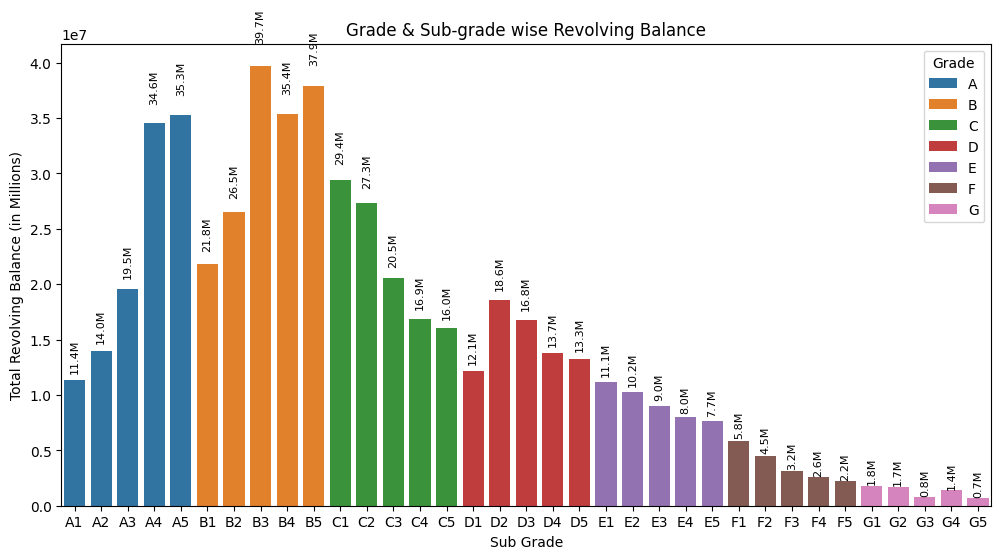

In [ ]:
# 2. Grade and Sub-grade wise revol_bal
grade_revol = df.groupby(['grade','sub_grade'])['revol_bal'].sum().reset_index()

plt.figure(figsize=(12,6))
ax = sns.barplot(x='sub_grade', y='revol_bal', hue='grade', data=grade_revol, dodge=False)

# Add labels in millions on top of bars
for p in ax.patches:
    value = p.get_height()
    if value > 0:
        ax.text(
            p.get_x() + p.get_width()/2,  # X position (center of bar)
            value + 0.05*value,          # Y position (slightly above bar)
            f"{value/1e6:.1f}M",         # Format in millions
            ha='center', va='bottom', fontsize=8, rotation=90
        )

plt.title("Grade & Sub-grade wise Revolving Balance")
plt.ylabel("Total Revolving Balance (in Millions)")
plt.xlabel("Sub Grade")
plt.legend(title="Grade")
plt.show()


/tmp/ipython-input-3117945102.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  verify_payment = df.groupby('verification_status')['total_pymnt'].sum().reset_index()


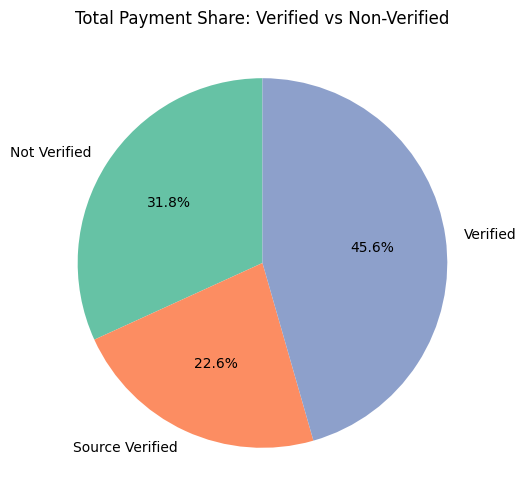

In [ ]:
# Group by verification status and calculate total payment
verify_payment = df.groupby('verification_status')['total_pymnt'].sum().reset_index()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    verify_payment['total_pymnt'],
    labels=verify_payment['verification_status'],
    autopct='%1.1f%%',      # show percentages with 1 decimal
    startangle=90,          # rotate chart for better look
    colors=sns.color_palette("Set2")  # nice color palette
)
plt.title("Total Payment Share: Verified vs Non-Verified")
plt.show()


/tmp/ipython-input-2112742247.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_loan = df.groupby('addr_state')['loan_amnt'].sum().reset_index()
/tmp/ipython-input-2112742247.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='addr_state', y='loan_amnt_million', data=state_loan, palette="viridis")


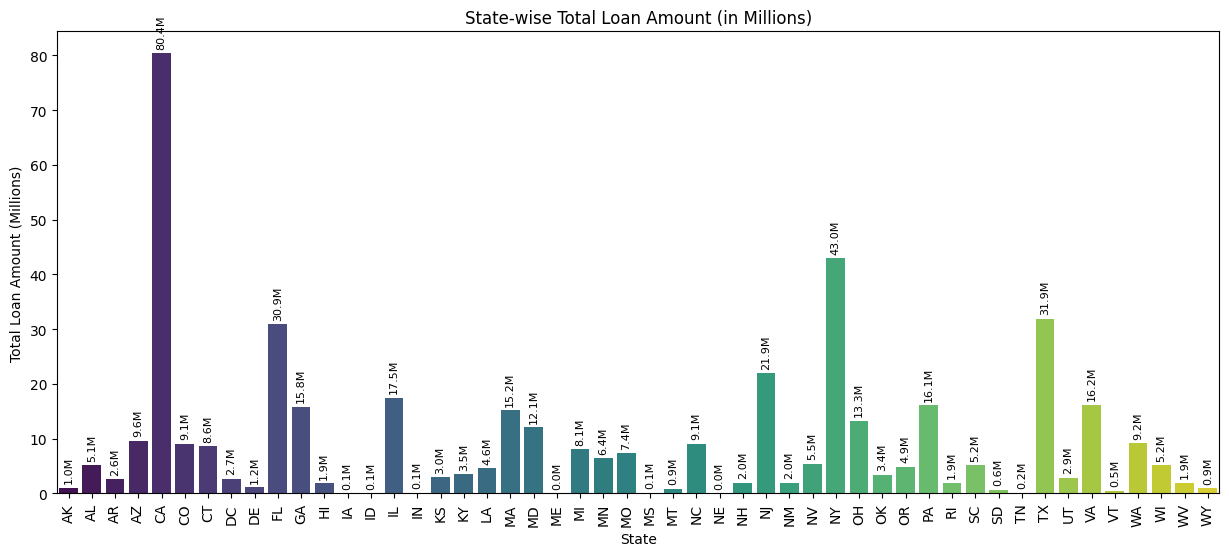

In [ ]:
# Group by State and calculate total loan amount
state_loan = df.groupby('addr_state')['loan_amnt'].sum().reset_index()

# Convert to millions
state_loan['loan_amnt_million'] = state_loan['loan_amnt'] / 1_000_000

# Sort descending
state_loan = state_loan.sort_values(by='loan_amnt_million', ascending=False)

# Plot with labels
plt.figure(figsize=(15,6))
ax = sns.barplot(x='addr_state', y='loan_amnt_million', data=state_loan, palette="viridis")

plt.title("State-wise Total Loan Amount (in Millions)")
plt.xlabel("State")
plt.ylabel("Total Loan Amount (Millions)")
plt.xticks(rotation=90)

# Add labels slightly above bars
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2,
        p.get_height() + (0.01 * state_loan['loan_amnt_million'].max()),
        f'{p.get_height():.1f}M',   # format as X.XM
        ha='center', va='bottom', fontsize=8, rotation=90
    )

plt.show()


/tmp/ipython-input-3352726265.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_data = df.groupby(['last_pymnt_year', 'home_ownership']).size().reset_index(name='count')


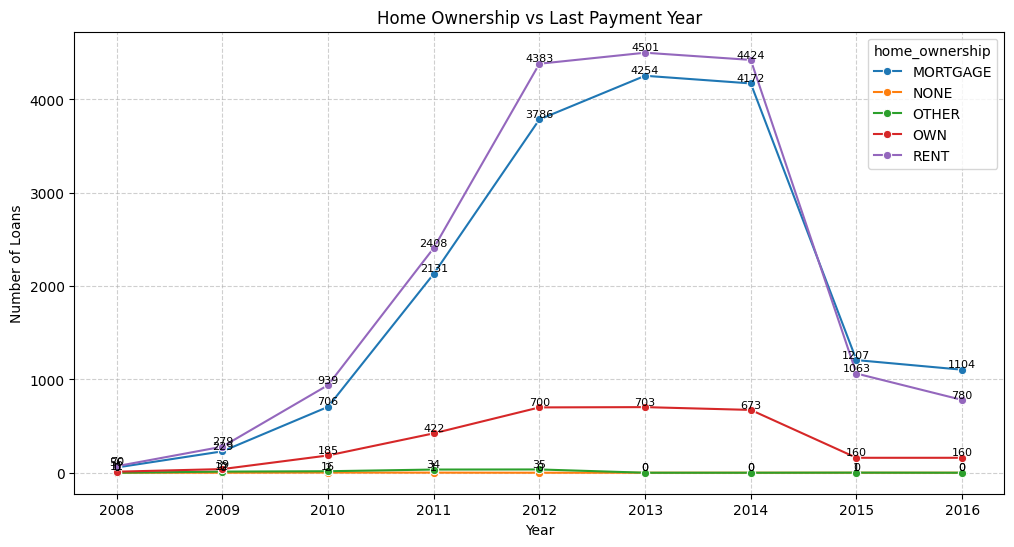

In [ ]:
# Extract year from last payment date
df['last_pymnt_year'] = df['last_pymnt_d'].dt.year

# Group data
trend_data = df.groupby(['last_pymnt_year', 'home_ownership']).size().reset_index(name='count')

# Line chart with markers
plt.figure(figsize=(12,6))
sns.lineplot(
    data=trend_data,
    x='last_pymnt_year',
    y='count',
    hue='home_ownership',
    marker='o'
)

# Add data labels
for x, y, ho in zip(trend_data['last_pymnt_year'], trend_data['count'], trend_data['home_ownership']):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=8)

plt.title("Home Ownership vs Last Payment Year")
plt.xlabel("Year")
plt.ylabel("Number of Loans")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
